# **CS5062 – Machine Learning - Assessment 1**

**Import libraries**

In [ ]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Import data using pandas**

In [ ]:
data = pd.read_csv("/content/soybean_tabular.csv")
data.head(10)

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
0,1,4.0900,15.3,396.90,4.98,0.00632,18.0,6.575,2.381979,0.475522,65.2,296.350195,24.0
1,2,4.9671,17.8,396.90,9.14,0.02731,0.0,6.421,7.071148,0.509165,78.9,241.620198,21.6
2,2,4.9671,17.8,392.83,4.03,0.02729,0.0,7.185,6.896941,0.580673,61.1,241.551476,34.7
3,3,6.0622,18.7,394.63,2.94,0.03237,0.0,6.998,2.237817,0.491539,45.8,222.023994,33.4
4,3,6.0622,18.7,396.90,5.33,0.06905,0.0,7.147,1.979327,0.103660,54.2,221.723972,36.2
5,3,6.0622,18.7,394.12,5.21,0.02985,0.0,6.430,2.277990,0.440205,58.7,222.397094,28.7
6,5,5.5605,15.2,395.60,12.43,0.08829,12.5,6.012,7.890084,0.488405,66.6,311.698716,22.9
7,5,5.9505,15.2,396.90,19.15,0.14455,12.5,6.172,7.853717,0.525266,96.1,311.820462,27.1
8,5,6.0821,15.2,386.63,29.93,0.21124,12.5,5.631,7.825090,0.502674,100.0,311.276986,16.5
9,5,6.5921,15.2,386.71,17.10,0.17004,12.5,6.004,7.907141,0.460825,85.9,310.985228,18.9


**Descriptive Statistics**

The range is equivalent to (min,max) and the median is equivalent to the 50% percentile

In [ ]:
data.describe()

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,9.549407,3.795043,18.455534,356.674032,12.653063,3.613524,11.363636,6.284634,11.131488,0.551258,68.574901,408.252839,22.532806
std,8.707259,2.105710,2.164946,91.294864,7.141062,8.601545,23.322453,0.702617,6.868654,0.181693,28.148861,168.530578,9.197104
min,1.000000,1.129600,12.600000,0.320000,1.730000,0.006320,0.000000,3.561000,0.472905,0.103660,2.900000,186.765075,5.000000
25%,4.000000,2.100175,17.400000,375.377500,6.950000,0.082045,0.000000,5.885500,5.149096,0.422286,45.025000,278.745884,17.025000
50%,5.000000,3.207450,19.050000,391.440000,11.360000,0.256510,0.000000,6.208500,9.588040,0.528133,77.500000,330.467783,21.200000
75%,24.000000,5.188425,20.200000,396.225000,16.955000,3.677082,12.500000,6.623500,18.094315,0.668573,94.075000,665.354401,25.000000
max,24.000000,12.126500,22.000000,396.900000,37.970000,88.976200,100.000000,8.780000,28.074197,1.158538,100.000000,711.210992,50.000000


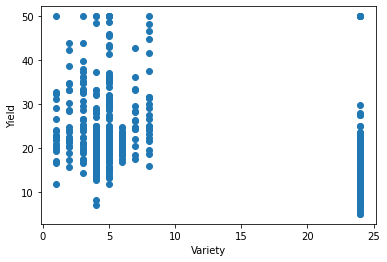

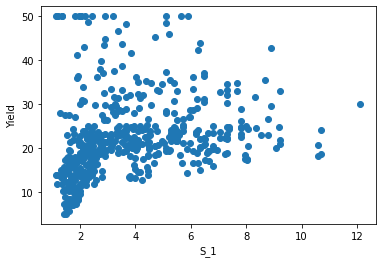

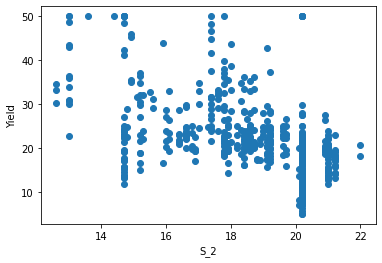

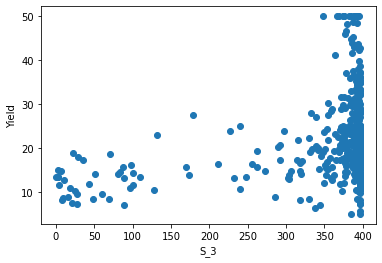

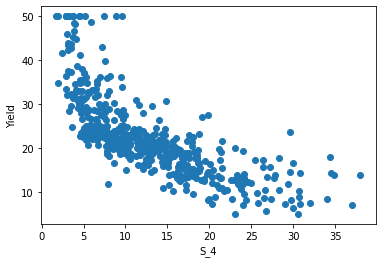

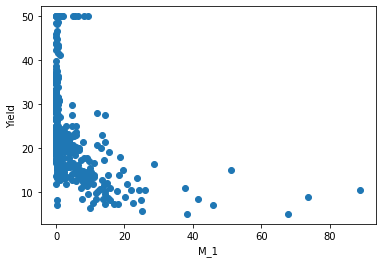

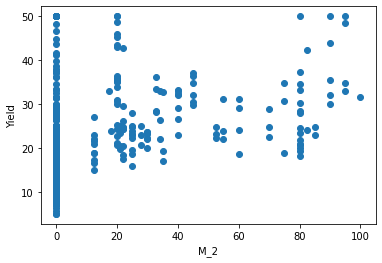

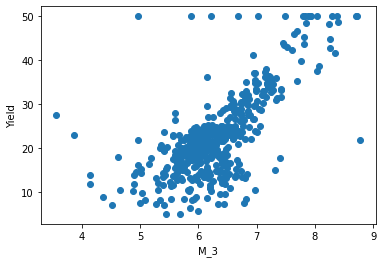

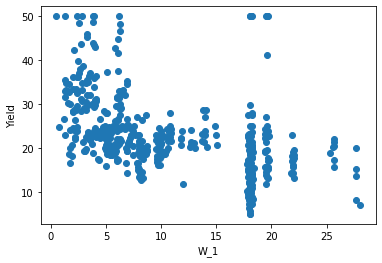

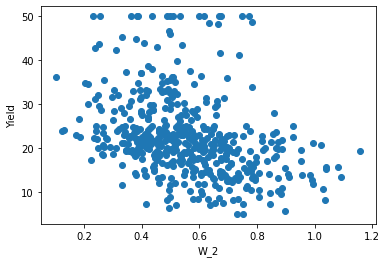

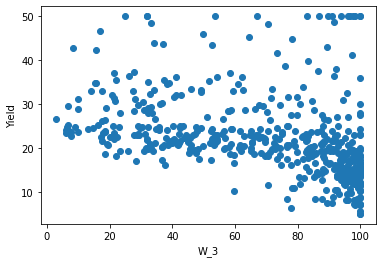

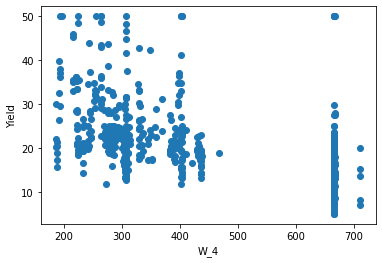

In [ ]:
for column in data.columns:
    if column != 'Yield':
       pyplot.scatter(data[column],data['Yield'])
       pyplot.xlabel(column) #x label
       pyplot.ylabel('Yield') #y label
       pyplot.show()

**Checking for missing values**

In [ ]:
data.isnull().sum()

Variety    0
S_1        0
S_2        0
S_3        0
S_4        0
M_1        0
M_2        0
M_3        0
W_1        0
W_2        0
W_3        0
W_4        0
Yield      0
dtype: int64

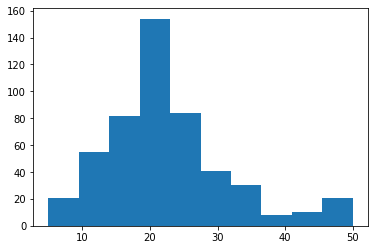

In [ ]:
pyplot.hist(data['Yield'])
pyplot.show()

**Split data into X and y**

In [ ]:
len_columns = len(data.columns)
# input features
X = data.iloc[:,0:len_columns-1]
# target feature
y = data.iloc[:,len_columns-1:]

# **Baseline Model - Linear Regression**

**Split unscaled data into train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Fitting model to data**

In [ ]:
# init model
lr = LinearRegression()
# fit train data to model
lr.fit(X_train, y_train)
# obtain predictions for test data
predictions = lr.predict(X_test)
# obtain metrics for regression model
print("MSE: {}".format(mean_squared_error(predictions,y_test)))
print("MAE: {}".format(mean_absolute_error(predictions,y_test)))
print("R Score: {}".format(r2_score(predictions,y_test)))

MSE: 36.3327343494191
MAE: 3.914244939109405
R Score: 0.2968046787034483


# **Lasso & Ridge Regression**

**Normalization & Standardization**

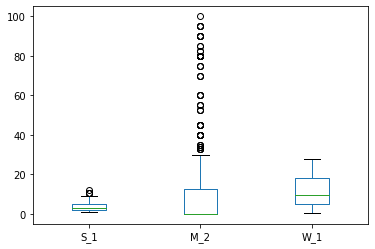

In [ ]:
sample = data.filter(['S_1','M_2','W_1'], axis=1)
sample.plot(kind='box')

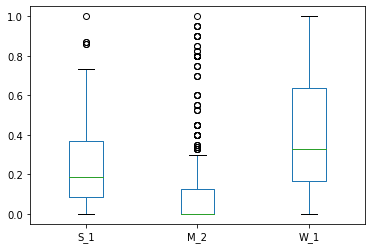

In [ ]:
# normalize data
norm_scaler = MinMaxScaler()
X = norm_scaler.fit_transform(X)

# convert numpy array X to dataframe
sample2 = pd.DataFrame(X,columns=['Variety', 'S_1', 'S_2', 'S_3', 'S_4', 'M_1', 'M_2', 'M_3', 'W_1','W_2', 'W_3', 'W_4'])
# example columns
sample2 = sample2.filter(['S_1','M_2','W_1'],axis=1)
# visualize box plot of scaled data
sample2.plot(kind='box')

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

**Split scaled data into train and test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Split scaled train dataset into train & validation sets**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

**Lasso & Ridge parameter sets**

alpha is lambda

In [ ]:
lasso_params = {'alpha':[0.005,0.01,0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[0.5,1,2,5,7.5,10,20]}

**Ridge Regression Model**

In [ ]:
!pip install hypopt

In [ ]:
from hypopt import GridSearch

ridge = GridSearch(model = Ridge(), param_grid = ridge_params)
ridge.fit(X_train, y_train, X_val, y_val)

#best estimator
print(ridge.best_estimator_)

# best model
best_model = ridge.best_estimator_
best_model.fit(X_train,y_train)

ridge_predict = best_model.predict(X_val)
mse = mean_squared_error(ridge_predict,y_val)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mean_absolute_error(ridge_predict,y_val)))
print("Normalized RMSE: {}".format(rmse/(min(data['Yield']) + max(data['Yield']))))

100%|██████████| 7/7 [00:00<00:00, 188.70it/s]

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)
MSE: 18.969179640760185
RMSE: 4.355362171020934
MAE: 3.3510871096039585


In [ ]:
min(data['Yield'])

5.0

**Ridge Regression Predictions on Test Set**

In [ ]:
ridge_predict = best_model.predict(X_test)
mse = mean_squared_error(ridge_predict,y_test)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mean_absolute_error(ridge_predict,y_test)))
print("Normalized RMSE: {}".format(rmse/(min(data['Yield']) + max(data['Yield']))))

MSE: 36.88790746639661
RMSE: 6.073541591723614
MAE: 3.8869424877106646
Normalized RMSE: 0.11042802894042934


 **Lasso Regression**

In [ ]:
lasso = GridSearch(model = Lasso(), param_grid = lasso_params)
lasso.fit(X_train, y_train, X_val, y_val)

#best estimator
print(lasso.best_estimator_)

# best model
best_lasso = lasso.best_estimator_
best_lasso.fit(X_train,y_train)

lasso_predict = best_lasso.predict(X_val)
mse = mean_squared_error(lasso_predict,y_val)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mean_absolute_error(lasso_predict,y_val)))
print("Normalized RMSE: {}".format(rmse/(min(data['Yield']) + max(data['Yield']))))

100%|██████████| 7/7 [00:00<00:00, 186.38it/s]

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)
MSE: 18.899366615560186
RMSE: 4.347340177115219
MAE: 3.3514337381091064
Normalized RMSE: 0.07904254867482217


**Lasso Regression Predictions on Test Set**

In [ ]:
lasso_predict = best_lasso.predict(X_test)
mse = mean_squared_error(lasso_predict,y_test)
rmse = np.sqrt(mse)

print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("MAE: {}".format(mean_absolute_error(lasso_predict,y_test)))
print("Normalized RMSE: {}".format(rmse/(min(data['Yield']) + max(data['Yield']))))

MSE: 36.17198336576552
RMSE: 6.014314870853164
MAE: 3.8574737439396487
Normalized RMSE: 0.10935117947005754


## **Model Coefficients Interpretation**

**Ridge Model**

In [ ]:
# ridge coeff in a list
importance = best_model.coef_

for element in importance:
  for i,v in enumerate(element):
     print("Feature: {}, Score: {}".format(i,v))

Feature: 0, Score: 4.3294689699310895
Feature: 1, Score: -12.2300397917707
Feature: 2, Score: -7.419235824176125
Feature: 3, Score: 3.8524252786445277
Feature: 4, Score: -18.91981642089639
Feature: 5, Score: -7.545333719402083
Feature: 6, Score: 4.31224825828231
Feature: 7, Score: 16.593798082118603
Feature: 8, Score: -2.975163805397643
Feature: 9, Score: -2.902276669431088
Feature: 10, Score: -1.7486394103612237
Feature: 11, Score: -5.377475341450986


**Lasso Model**

In [ ]:
# lasso coeff in a list
importance = best_lasso.coef_

i = 0
for element in importance:
  print("Feature: {}, Score: {}".format(i,element))
  i += 1

Feature: 0, Score: 2.5715515581340496
Feature: 1, Score: -11.562085252895447
Feature: 2, Score: -6.808196788068245
Feature: 3, Score: 3.1831627919889067
Feature: 4, Score: -21.123516577760284
Feature: 5, Score: -5.588107843407929
Feature: 6, Score: 3.972855705512531
Feature: 7, Score: 18.142633889760813
Feature: 8, Score: -2.357345734875172
Feature: 9, Score: -2.194646810082585
Feature: 10, Score: -0.9261906001647643
Feature: 11, Score: -3.9590764681628436


**The model found four positive-correlated features with the 'Yield', with Feature 7 (i.e, M_2) being the most important. Feature 4 (i.e, S_3) has the most negative correlation, whilst Feature 10 (i.e, W_2) has the most neutral relationship**